In [1]:
import sys
sys.path.append('/home/hugo/PycharmProjects/routeplanner/src')

import osmnx as ox
import networkx as nx

import app_create
import traffic as tr
import logging

logging.basicConfig(filename='routeplanner.log', level=logging.DEBUG)

app = app_create.app_create()


2021-09-12 17:50:51 Configured OSMnx 1.1.1
2021-09-12 17:50:51 HTTP response caching is on
2021-09-12 17:50:56 Converting node, edge, and graph-level attribute data types
2021-09-12 17:50:57 Loaded graph with 41788 nodes and 82946 edges from "../data/madrid.gml"
2021-09-12 17:50:58 Created edges GeoDataFrame from graph


[17:51:00] ../src/executor/graph_executor.cc:1995: Subgraph backend MKLDNN is activated.


In [2]:
# origin_point = (-3.6121729, 40.4524813)
# destination_point = (-3.7090030, 40.4538682)

# worst case
origin_point = (-3.605999, 40.449260)
destination_point = (-3.692042, 40.374467)



route, valid = app.get_route(origin_point, destination_point)

print(route)
print(valid)




2021-09-12 17:51:00 Created nodes GeoDataFrame from graph
2021-09-12 17:51:00 Created nodes GeoDataFrame from graph
[88054521, 88054518, 3061515873, 3061515872, 3061515868, 88120554, 3061515869, 88054590, 88054668, 88054371, 88054670, 88054811, 1531704812, 88054896, 88053953, 88053975, 88053994, 4546196044, 88053901, 31066966, 29795837, 3642316893, 2208138773, 31146526, 2208138765, 29795832, 2208138760, 2208138756, 2208138754, 2208138747, 2208138744, 2208138743, 2208138742, 4827268314, 64944202, 31107294, 31107200, 64947476, 64948344, 64949144, 64949147, 1833057997, 100981319, 3277380925, 100981587, 100981260, 100976150, 3258078989, 100976372, 100976371, 25531125, 1833026268, 25531124, 1838956113, 250637505, 1833026270, 100973573, 250637364, 25531122, 25531116, 25531121, 1833026273, 1833030576, 25531119, 25531117, 3258739137, 25531118, 1884642689, 25531128, 1377849344, 1377849342, 101023775, 101023776, 101023777, 101025021, 101025640, 101025641, 101034261, 3115801461, 101033465, 101022

In [3]:
G = app.graph
node_src = ox.distance.nearest_nodes(G, origin_point[0], origin_point[1])
node_dst = ox.distance.nearest_nodes(G, destination_point[0], destination_point[1])
route2 = nx.shortest_path(G, node_src, node_dst, weight='weight')

print(node_dst)
print(route2)



2021-09-12 17:51:33 Created nodes GeoDataFrame from graph
2021-09-12 17:51:33 Created nodes GeoDataFrame from graph
315888020
[88054521, 88054518, 31503416, 31503415, 571434080, 392255285, 571430781, 577293989, 251948076, 251948074, 6432405765, 251949516, 392254787, 507375850, 251954247, 249836810, 251564332, 355234804, 21527020, 1890257861, 25926130, 1915440303, 21473220, 21473226, 21473229, 21473233, 25927232, 25927245, 1275004814, 25938853, 25943343, 25943986, 2493682299, 25944392, 25944436, 248945412, 25944598, 25944603, 306155053, 2266202098, 306153900, 26205179, 26205250, 26280681, 26280682, 26280683, 4374935741, 401244696, 130093428, 130093215, 130093161, 176545387, 130093163, 762207817, 130093176, 130095991, 306153024, 315888020]


2021-09-12 17:51:33 Begin plotting the graph...
2021-09-12 17:51:39 Created edges GeoDataFrame from graph
2021-09-12 17:51:46 Finished plotting the graph


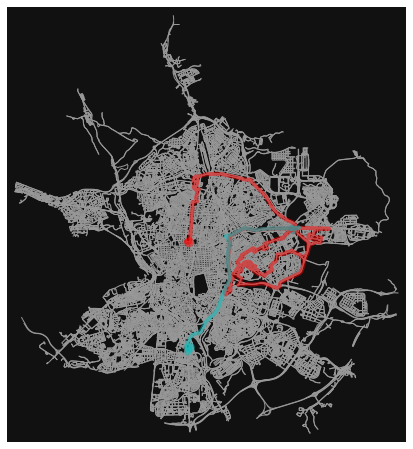

In [4]:

routes = [route, route2]
rc = ['r', 'c']
fig, ax = ox.plot_graph_routes(G, routes, route_colors=rc, route_linewidth=6, node_size=0 )


2021-09-12 18:03:34 Begin plotting the graph...
2021-09-12 18:03:38 Created edges GeoDataFrame from graph
2021-09-12 18:03:43 Finished plotting the graph


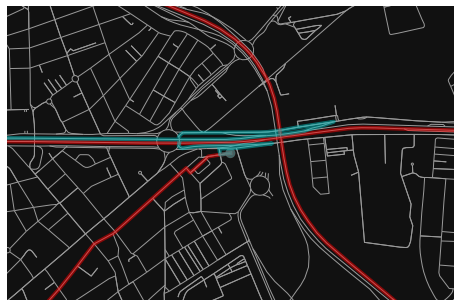

In [17]:

point = origin_point
delta = 0.005
north = point[1] + delta
south = point[1] - delta
east = point[0] + 2*delta
west = point[0] - 2*delta

bbox=(north, south, east, west)
fig, ax = ox.plot_graph_routes(G, routes, route_colors=rc, route_linewidth=6, node_size=0, bbox=(north, south, east, west))
